<a href="https://colab.research.google.com/github/neha702/Face-mask-detector/blob/main/Face_mask_detection_images(neural_net).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import cv2
from keras.models import Sequential
from keras.layers import Conv2D, Input,ZeroPadding2D, BatchNormalization, Activation, MaxPooling2D, Flatten, Dense,Dropout
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
train='/content/gdrive/MyDrive/face mask detection datasets/train'
test='/content/gdrive/MyDrive/face mask detection datasets/test'

In [ ]:
model = Sequential([
    Conv2D(100, (3,3), activation='relu', input_shape=(150, 150, 3)), #Filter size: powers of 2
    MaxPooling2D(2,2),
    
    Conv2D(100, (3,3), activation='relu'),
    MaxPooling2D(2,2),
  
    Flatten(),
    Dense(50, activation='relu'),
    Dense(2, activation='softmax') #As only two possibilites on or off
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

In [ ]:
train_data=ImageDataGenerator(rescale=1.0/255)
test_data=ImageDataGenerator(rescale=1.0/255)

In [ ]:
train_generator = train_data.flow_from_directory(train, 
                                                    batch_size=10, 
                                                    target_size=(150, 150))
test_generator = test_data.flow_from_directory(test, 
                                                    batch_size=10, 
                                                    target_size=(150, 150))

Found 1315 images belonging to 2 classes.
Found 194 images belonging to 2 classes.


In [ ]:
from keras.callbacks import TensorBoard, ModelCheckpoint

In [ ]:
checkpoint = ModelCheckpoint('model2-{epoch:03d}.model',monitor='val_loss',verbose=0,save_best_only=True,mode='auto')

In [ ]:
from keras.models import Model, load_model

In [ ]:
history = model.fit_generator(train_generator,
                              epochs=10,
                              validation_data=test_generator,
                              callbacks=[checkpoint])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
132/132 [==============================] - 729s 5s/step - loss: 0.7824 - acc: 0.7177 - val_loss: 0.1463 - val_acc: 0.9588
INFO:tensorflow:Assets written to: model2-001.model/assets
Epoch 2/10
132/132 [==============================] - 12s 89ms/step - loss: 0.1270 - acc: 0.9477 - val_loss: 0.0859 - val_acc: 0.9794
INFO:tensorflow:Assets written to: model2-002.model/assets
Epoch 3/10
132/132 [==============================] - 12s 88ms/step - loss: 0.0682 - acc: 0.9809 - val_loss: 0.1117 - val_acc: 0.9588
Epoch 4/10
132/132 [==============================] - 12s 90ms/step - loss: 0.0992 - acc: 0.9649 - val_loss: 0.1328 - val_acc: 0.9639
Epoch 5/10
132/132 [==============================] - 12s 90ms/step - loss: 0.0493 - acc: 0.9771 - val_loss: 0.1223 - val_acc: 0.9588
Epoch 6/10
132/132 [==============================] - 12s 90ms/step - loss: 0.0295 - acc: 0.9863 - val_loss: 0.2342 - val_acc: 0.9278
Epoch 7/10
132/132 [==============================] - 12s 91ms/step - loss: 0.0

In [ ]:
model=load_model("/content/model2-002.model")
haarcascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
results={0:'without mask',1:'mask'}
GR_dict={0:(0,0,255),1:(0,255,0)}

In [ ]:
#Face detector function
def face_mask_detector(img):
  faces=haarcascade.detectMultiScale(img)
  for (x, y, w, h) in faces:
    cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 3)
    face_img = img[y:y+h, x:x+w]
    rerect_sized=cv2.resize(face_img,(150,150))
    normalized=rerect_sized/255.0
    reshaped=np.reshape(normalized,(1,150,150,3))
    reshaped = np.vstack([reshaped])
    result=model.predict(reshaped)
    label=np.argmax(result,axis=1)[0]
      
    cv2.rectangle(img,(x,y),(x+w,y+h),GR_dict[label],2)
    cv2.rectangle(img,(x,y-40),(x+w,y),GR_dict[label],-1)
    cv2.putText(img, results[label], (x, y-10),cv2.FONT_HERSHEY_SIMPLEX,0.8,(255,255,255),2)


    key = cv2.waitKey(10)
    
    if key == 27: 
     break

  cap.release()

  cv2.destroyAllWindows()
  return img

In [ ]:
from google.colab.patches import cv2_imshow

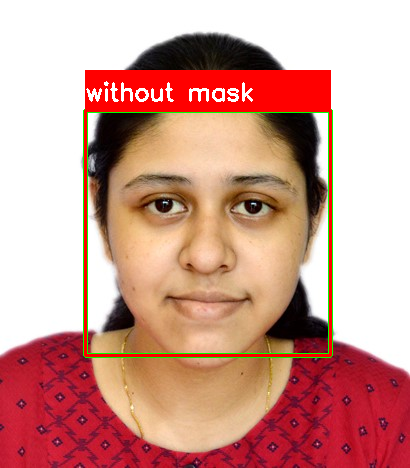

In [ ]:
input_image = cv2.imread("/content/DSC_0450.jpg")
output = face_mask_detector(input_image)
cv2_imshow(output)

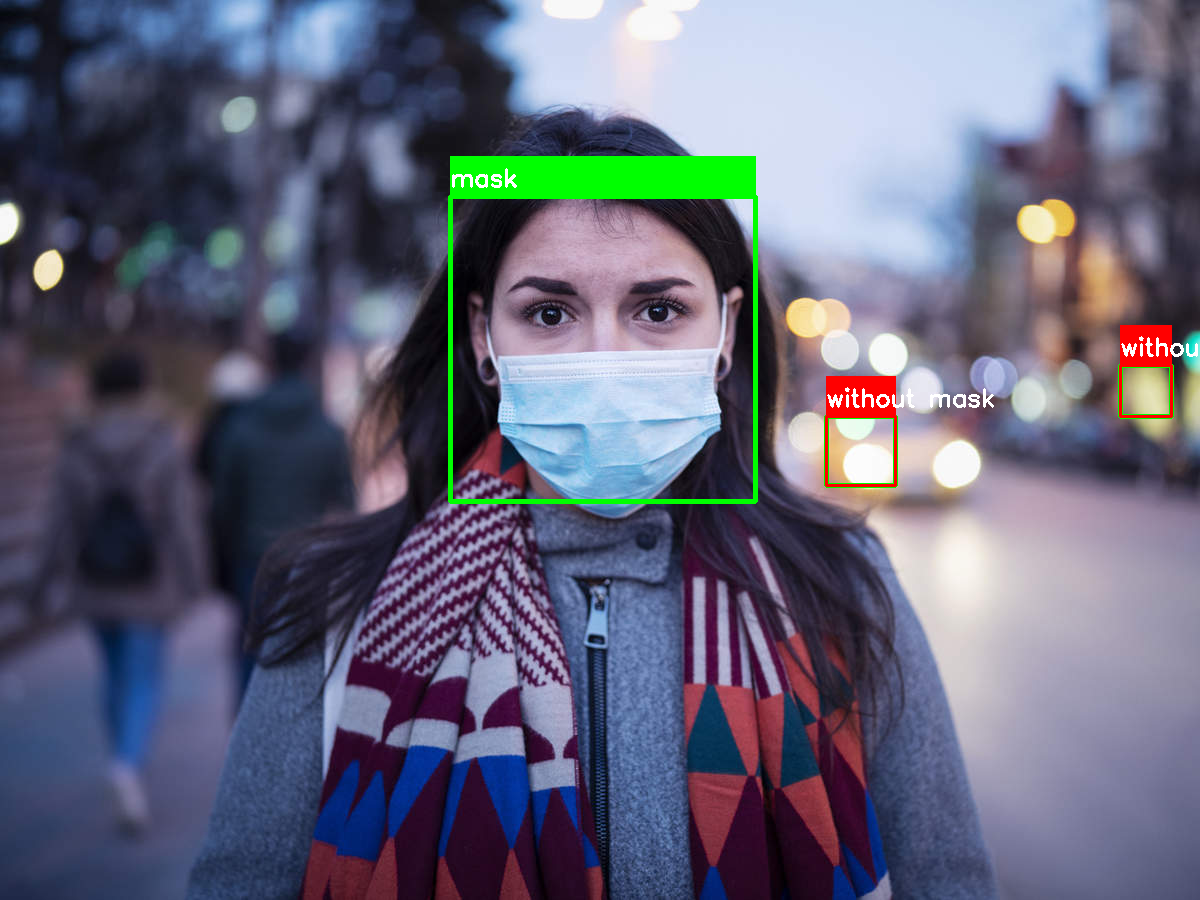

In [ ]:
input_image = cv2.imread("image.jpg")
output = face_mask_detector(input_image)
cv2_imshow(output)